## MNISTで多クラス分類

In [146]:
import torch
from sklearn import datasets
import matplotlib.pyplot as plt
from torch.nn import functional as F

In [147]:
# 1. データロード
dataset = datasets.load_digits()
images = dataset['images']
target = dataset['target']

(1797, 8, 8)


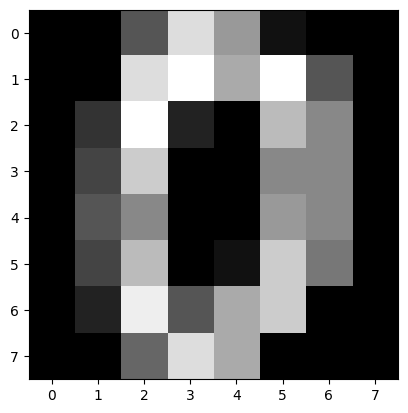

In [148]:
plt.imshow(images[0], cmap='grey')
print(images.shape)

In [149]:
target.shape

(1797,)

In [150]:
# 2. 前処理
# 2-1. ラベルのone-hot encoding
y_true = F.one_hot(torch.tensor(target), num_classes=10)
images = torch.tensor(images, dtype=torch.float32).reshape(-1, 64)
# 2-2. 画像の標準化
images = (images - images.mean()) / images.std()

In [151]:
learning_rate = 0.03
loss_log = []

In [152]:
# 3. パラメータの初期化
W = torch.rand((10, 64), requires_grad=True) # 出力×入力
b = torch.rand((1, 10), requires_grad=True) # 1 × 出力

In [153]:
# 4. softmaxとクロスエントロピー
def softmax(x):
    e_x = torch.exp(x - torch.max(x, dim=-1, keepdim=True)[0])
    return e_x / (torch.sum(e_x, dim=-1, keepdim=True) + 1e-10)

def cross_entropy(y_true, y_pred):
    return -torch.sum(y_true * torch.log(y_pred + 1e-10)) / y_true.shape[0]

In [154]:
# 5. for文で学習ループ作成
for epoch in range(5):
    running_loss = 0
    for i in range(len(target)):
        # 6. 入力データxおよび教師ラベルのYを作成
        y_true_ = y_true[i].reshape(-1, 10) # データ数×クラス数
        X = images[i].reshape(-1, 64) # データ数×特徴量

        # 7. z計算
        z = X@W.T + b

        # 8. softmaxで予測計算
        y_pred = softmax(z)

        # 9. 損失計算
        loss = cross_entropy(y_true_, y_pred)
        loss_log.append(loss.item())
        running_loss += loss.item()

        # 10. 勾配計算
        loss.backward()

        # 11. パラメータ更新
        with torch.no_grad():
            W -= learning_rate * W.grad
            b -= learning_rate * b.grad

        # 12. 勾配初期化
        W.grad.zero_()
        b.grad.zero_()

    # 13. 損失ログ出力
    print(f'epoch: {epoch+1}: {running_loss/len(target)}')

epoch: 1: 0.3899371371230606
epoch: 2: 0.1349450872025527
epoch: 3: 0.10619612576850244
epoch: 4: 0.09035435907385052
epoch: 5: 0.07927121607563944


In [155]:
# 学習したモデルで全データのaccuracyを計算する（学習に使っているデータに対してのAccuracyであることに注意）
X = torch.tensor(images, dtype=torch.float32)
z = X@W.T + b
y_pred = softmax(z)
# accuracy =正しく分類できた数/全サンプル数
torch.sum(torch.argmax(y_pred, dim=-1) == torch.argmax(y_true, dim=-1)) / y_true.shape[0]

<ipython-input-155-895871d2d51c>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(images, dtype=torch.float32)


tensor(0.9772)

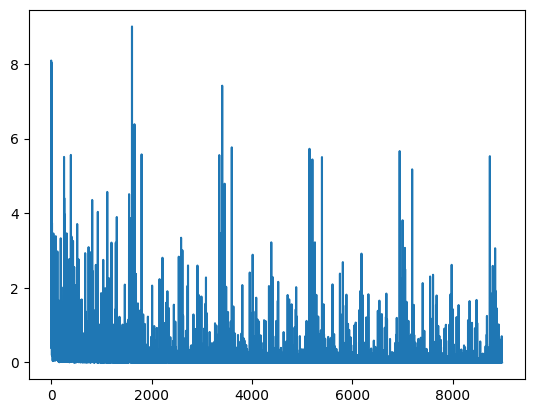

In [156]:
plt.plot(loss_log)